 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [38]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [39]:
# Reading whale returns
whale_returns_path = Path("../asu-tem-virt-fin-pt-04-2021-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [40]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [41]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [42]:
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [43]:
# Reading algorithmic returns
algo_returns_path = Path("../asu-tem-virt-fin-pt-04-2021-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [44]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [45]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [46]:
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [47]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("../asu-tem-virt-fin-pt-04-2021-u-c/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [48]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [49]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [50]:
sp500_history.dtypes

Close    float64
dtype: object

In [51]:
# Calculate Daily Returns
sp500_daily = sp500_history.pct_change()
sp500_daily.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [52]:
# Drop nulls
sp500_daily = sp500_daily.dropna()

In [53]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily.rename(columns = {"Close":"SP500"})

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [54]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_prices = pd.concat([whale_returns, algo_returns, sp500_daily], axis='columns', join='inner')
all_prices.columns = ['Soros Fund Management', 'Paulson & Co.inc.', 'Tiger Global Management LLC', 'Berkshire Hathaway INC', 'Algo 1', 'A','SP500']
all_prices.head()

,Soros Fund Management,Paulson & Co.inc.,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,A,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

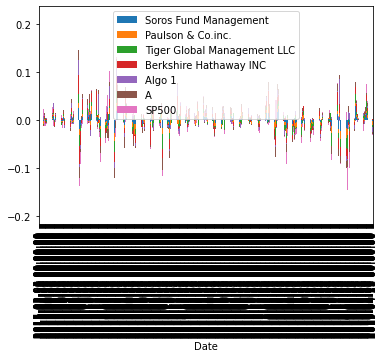

In [55]:
# Plot daily returns of all portfolios
all_prices.plot.bar(stacked=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

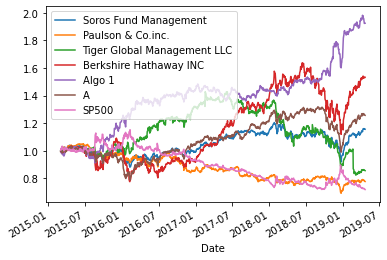

In [56]:
# Calculate cumulative returns of all portfolios
cumulative_ret = (1 + all_prices).cumprod()
# Plot cumulative returns
cumulative_ret.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

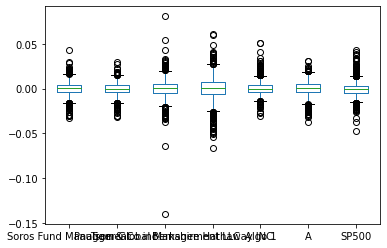

In [57]:
# Box plot to visually show risk
all_prices.plot.box()

### Calculate Standard Deviations

In [62]:
# Calculate the daily standard deviations of all portfolios
all_prices_std = all_prices.std()
all_prices_std.head()

Soros Fund Management          0.007896
Paulson & Co.inc.              0.007026
Tiger Global Management LLC    0.010897
Berkshire Hathaway INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [66]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily.std()

# Determine which portfolios are riskier than the S&P 500
sp500_std.head()

Close    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized standard deviation (252 trading days)
all_prices_252 = all_prices_std * np.sqrt(252)
all_prices_252

Soros Fund Management          0.125348
Paulson & Co.inc.              0.111527
Tiger Global Management LLC    0.172989
Berkshire Hathaway INC         0.205079
Algo 1                         0.121006
A                              0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

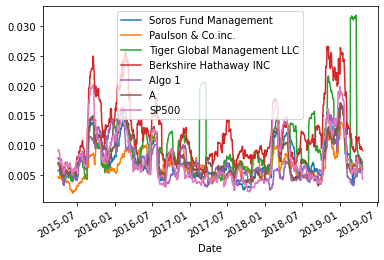

In [68]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_prices.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [69]:
# Calculate the correlation
correlation_prices = all_prices.corr()
# Display de correlation matrix
correlation_prices

,Soros Fund Management,Paulson & Co.inc.,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,A,SP500
Soros Fund Management,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson & Co.inc.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger Global Management LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
Berkshire Hathaway INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
A,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30 Day Beta'}, xlabel='Date'>

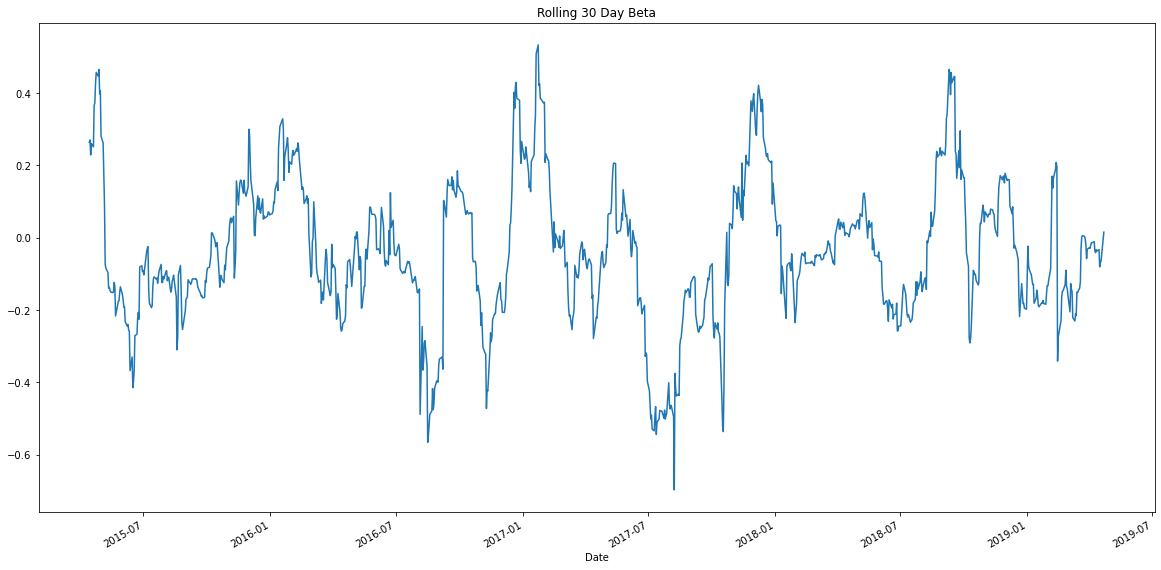

In [70]:
# Calculate covariance of a single portfolio
Algo1_cov = all_prices["Algo 1"].cov(all_prices["SP500"])
Algo1_cov
# Calculate variance of S&P 500
sp500_var = sp500_daily["Close"].var()
sp500_var
# Computing beta
Algo1_beta = Algo1_cov / sp500_var
Algo1_beta
# Plot beta trend
Algo1_rolling_cov = all_prices["Algo 1"].rolling(window=30).cov(all_prices["SP500"])
sp500_rolling_var = all_prices["SP500"].rolling(window=30).var()
Algo1_rolling_beta = Algo1_rolling_cov / sp500_rolling_var
Algo1_rolling_beta.plot(figsize=(20, 10), title="Rolling 30 Day Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [71]:
# Annualized Sharpe Ratios
all_prices_sharp = ((all_prices.mean()-all_prices["Algo 1"].mean()) *252) / (all_prices.std() * np.sqrt(252))
all_prices_sharp

Soros Fund Management         -0.979257
Paulson & Co.inc.             -1.977428
Tiger Global Management LLC   -1.088217
Berkshire Hathaway INC        -0.201381
Algo 1                         0.000000
A                             -0.767273
SP500                         -1.734384
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

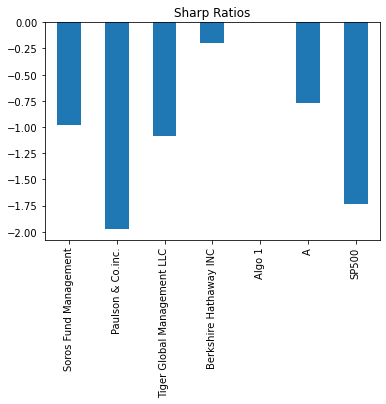

In [72]:
# Visualize the sharpe ratios as a bar plot
all_prices_sharp.plot(kind="bar", title="Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

No, there seems to be a negative rolling beta for the SnP500 and the other whale portforlios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [73]:
# Reading data from 1st stock
nflx_path = Path('Netflix.csv')
nflx = pd.read_csv(nflx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
nflx.head()

,Close,Symbol
Date,,
2019-02-12 16:00:00,359.97,NFLX
2019-02-13 16:00:00,351.77,NFLX
2019-02-14 16:00:00,359.07,NFLX
2019-02-15 16:00:00,356.87,NFLX
2019-02-19 16:00:00,361.92,NFLX


In [74]:
# Reading data from 2nd stock
aapl_path = Path('apple.csv')
aapl = pd.read_csv(aapl_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl.head()

,Close,Symbol
Date,,
2019-02-12 16:00:00,42.72,AAPL
2019-02-13 16:00:00,42.55,AAPL
2019-02-14 16:00:00,42.70,AAPL
2019-02-15 16:00:00,42.61,AAPL
2019-02-19 16:00:00,42.73,AAPL


In [75]:
# Reading data from 3rd stock
amzn_path = Path('amazon.csv')
amzn = pd.read_csv(amzn_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn.head()

,Close,Symbol
Date,,
2019-02-12 16:00:00,1638.01,AMZN
2019-02-13 16:00:00,1640.00,AMZN
2019-02-14 16:00:00,1622.65,AMZN
2019-02-15 16:00:00,1607.95,AMZN
2019-02-19 16:00:00,1627.58,AMZN


In [76]:
# Combine all stocks in a single DataFrame
stock_df = pd.concat([nflx, aapl, amzn], axis='rows', join="inner")

In [77]:
# Reset Date index
stock_df = stock_df.reset_index()

In [78]:
# Reorganize portfolio data by having a column per symbol
stock_df = stock_df.pivot_table(values='Close', index='Date', columns='Symbol')
stock_df.head()

Symbol,AAPL,AMZN,NFLX
Date,,,
2019-02-12 16:00:00,42.72,1638.01,359.97
2019-02-13 16:00:00,42.55,1640.00,351.77
2019-02-14 16:00:00,42.70,1622.65,359.07
2019-02-15 16:00:00,42.61,1607.95,356.87
2019-02-19 16:00:00,42.73,1627.58,361.92


In [79]:
# Calculate daily returns
stock_returns = stock_df.pct_change()
# Drop NAs/# Display sample data
stock_returns.dropna().head()

Symbol,AAPL,AMZN,NFLX
Date,,,
2019-02-13 16:00:00,-0.003979,0.001215,-0.022780
2019-02-14 16:00:00,0.003525,-0.010579,0.020752
2019-02-15 16:00:00,-0.002108,-0.009059,-0.006127
2019-02-19 16:00:00,0.002816,0.012208,0.014151
2019-02-20 16:00:00,0.006553,-0.003367,-0.005554


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = stock_returns.dot(weights)
weighted_returns = weighted_returns.dropna()
# weighted_returns.rename(columns={" ":"Weighted"})

# Display sample data
weighted_returns.head()


Date
2019-02-13 16:00:00   -0.008515
2019-02-14 16:00:00    0.004566
2019-02-15 16:00:00   -0.005765
2019-02-19 16:00:00    0.009725
2019-02-20 16:00:00   -0.000789
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.DataFrame({"AAPL":stock_returns["AAPL"],
                           "AMZN":stock_returns["AMZN"],
                           "NFLX":stock_returns["NFLX"],
                           "Returns":weighted_returns})
all_returns

,AAPL,AMZN,NFLX,Returns
Date,,,,
2019-02-12 16:00:00,NaN,NaN,NaN,NaN
2019-02-13 16:00:00,-0.003979,0.001215,-0.022780,-0.008515
2019-02-14 16:00:00,0.003525,-0.010579,0.020752,0.004566
2019-02-15 16:00:00,-0.002108,-0.009059,-0.006127,-0.005765
2019-02-19 16:00:00,0.002816,0.012208,0.014151,0.009725
...,...,...,...,...
2019-05-07 16:00:00,-0.026861,-0.015150,-0.021681,-0.021231
2019-05-08 16:00:00,0.000197,-0.001681,-0.016439,-0.005974
2019-05-09 16:00:00,-0.010842,-0.009334,-0.004446,-0.008207


In [92]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns

,AAPL,AMZN,NFLX,Returns
Date,,,,
2019-02-13 16:00:00,-0.003979,0.001215,-0.022780,-0.008515
2019-02-14 16:00:00,0.003525,-0.010579,0.020752,0.004566
2019-02-15 16:00:00,-0.002108,-0.009059,-0.006127,-0.005765
2019-02-19 16:00:00,0.002816,0.012208,0.014151,0.009725
2019-02-20 16:00:00,0.006553,-0.003367,-0.005554,-0.000789
...,...,...,...,...
2019-05-07 16:00:00,-0.026861,-0.015150,-0.021681,-0.021231
2019-05-08 16:00:00,0.000197,-0.001681,-0.016439,-0.005974
2019-05-09 16:00:00,-0.010842,-0.009334,-0.004446,-0.008207


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!